In [14]:
import pandas as pd
import numpy as np
from keras.models import load_model
from numpy import array
import os
from PIL import Image
from pickle import dump, load
import pickle
from time import time
from keras.preprocessing import sequence
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
import tensorflow as tf
import cv2

In [3]:
model = InceptionV3(weights='imagenet')
model_new = Model(model.input, model.layers[-2].output)
print("Model Running...")

2022-03-19 21:23:06.144919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-19 21:23:06.144965: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-19 21:23:06.144989: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4ca66b5771c3): /proc/driver/nvidia/version does not exist
2022-03-19 21:23:06.145271: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


   16384/96112376 [..............................] - ETA: 0s

  737280/96112376 [..............................] - ETA: 6s

 4202496/96112376 [>.............................] - ETA: 3s

 5054464/96112376 [>.............................] - ETA: 3s

 8396800/96112376 [=>............................] - ETA: 3s

 9330688/96112376 [=>............................] - ETA: 3s

11657216/96112376 [==>...........................] - ETA: 2s

15630336/96112376 [===>..........................] - ETA: 2s

16916480/96112376 [====>.........................] - ETA: 2s

18030592/96112376 [====>.........................] - ETA: 2s

23199744/96112376 [======>.......................] - ETA: 1s

25616384/96112376 [======>.......................] - ETA: 1s

27074560/96112376 [=======>......................] - ETA: 1s

33693696/96112376 [=========>....................] - ETA: 1s

34709504/96112376 [=========>....................] - ETA: 1s

38117376/96112376 [==========>...................] - ETA: 1s

41951232/96112376 [============>.................] - ETA: 1s

43147264/96112376 [============>.................] - ETA: 1s

47177728/96112376 [=============>................] - ETA: 1s

50421760/96112376 [==============>...............] - ETA: 0s

51486720/96112376 [===============>..............] - ETA: 0s

56721408/96112376 [================>.............] - ETA: 0s

58728448/96112376 [=================>............] - ETA: 0s

59809792/96112376 [=================>............] - ETA: 0s

65011712/96112376 [===================>..........] - ETA: 0s

67330048/96112376 [====================>.........] - ETA: 0s

68476928/96112376 [====================>.........] - ETA: 0s

74252288/96112376 [======================>.......] - ETA: 0s

75833344/96112376 [======================>.......] - ETA: 0s

77144064/96112376 [=======================>......] - ETA: 0s

83894272/96112376 [=========================>....] - ETA: 0s

85057536/96112376 [=========================>....] - ETA: 0s

90243072/96112376 [===========================>..] - ETA: 0s

92372992/96112376 [===========================>..] - ETA: 0s

96116736/96112376 [==============================] - 2s 0us/step


96124928/96112376 [==============================] - 2s 0us/step


Model Running...


In [4]:
def preprocess(image_path):
    path = image_path
#     img = image.load_img(path, target_size=(299, 299))
    img=cv2.imread(image_path)
    img=cv2.resize(img, (299,299))
#     x = image.img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    return x

In [5]:
def encode(image):
    image = preprocess(image)
    fea_vec = model_new.predict(image)
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    return fea_vec

In [7]:
vocab = pd.read_csv("vocab.csv",names=[0])
vocab = np.array(vocab)

In [8]:
# Giving index no. to vocabulary of each words
ixtoword = {}
wordtoix = {}
ix = 1
for word in vocab:
    ixtoword[ix] = word[0]
    wordtoix[word[0]] = ix
    ix += 1
print(ixtoword[1])
print(wordtoix["startseq"])

startseq
1


In [9]:
model_1 = load_model("model_31.h5")

In [10]:
def greedySearch(photo):
    in_text = 'startseq'
    max_length = 34
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model_1.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [11]:
import matplotlib.pyplot as plt
def predict(path):
    encoding_train = {}
    encoding_train[path] = encode(path)
#     encoding_train
    pic = list(encoding_train.keys())[0]
    image = encoding_train[pic].reshape((1,2048))
    x=plt.imread(pic)
    plt.imshow(x)
    plt.show()
    return greedySearch(image)

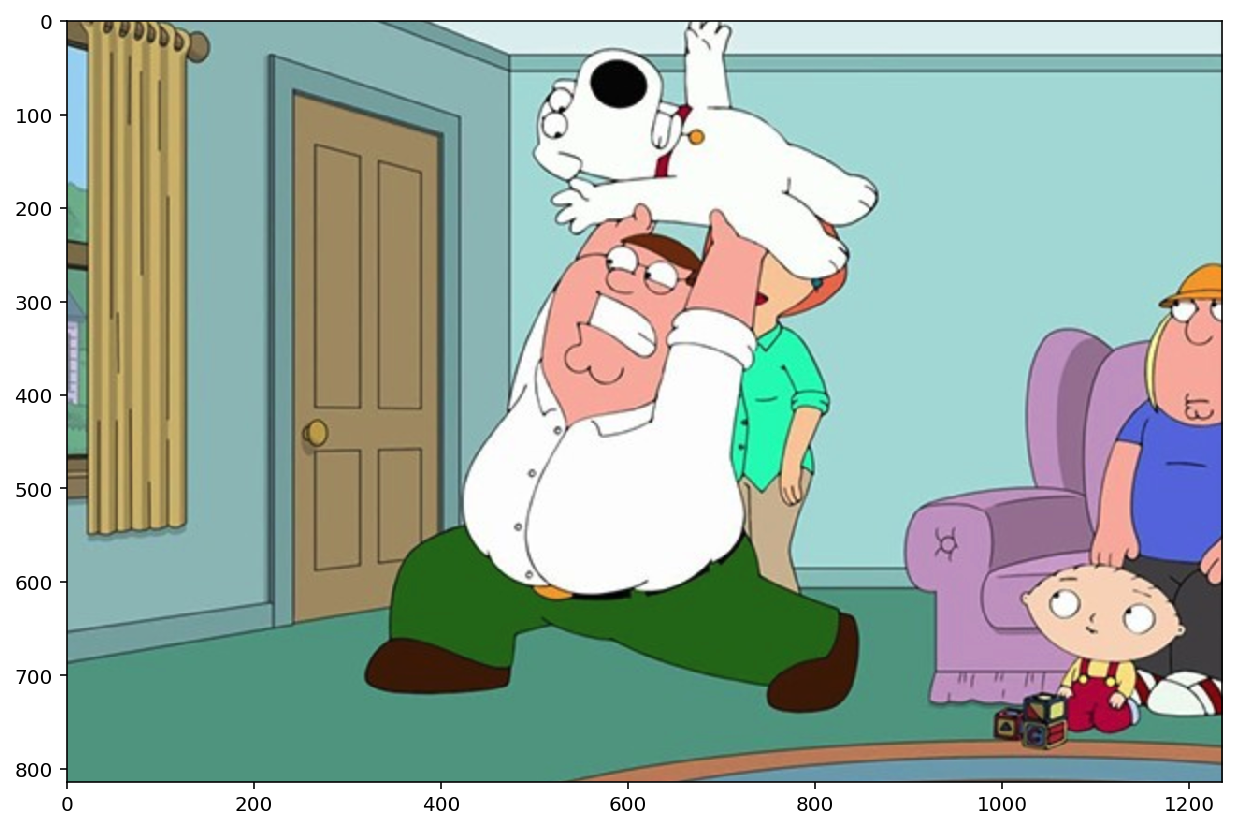

'two girls are sitting on bed with their hands out of the air'

In [16]:
predict("dog.png")

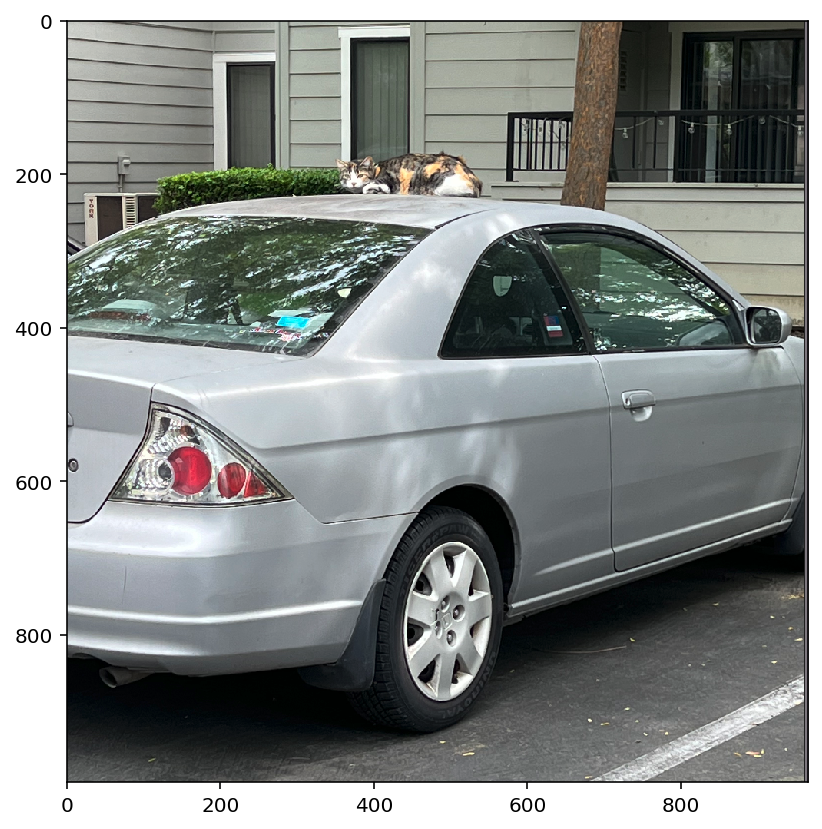

'the backs of man in the ocean'

In [17]:
predict("cat.png")